In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'

df = pd.read_csv(file_path , parse_dates=['date'] , index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


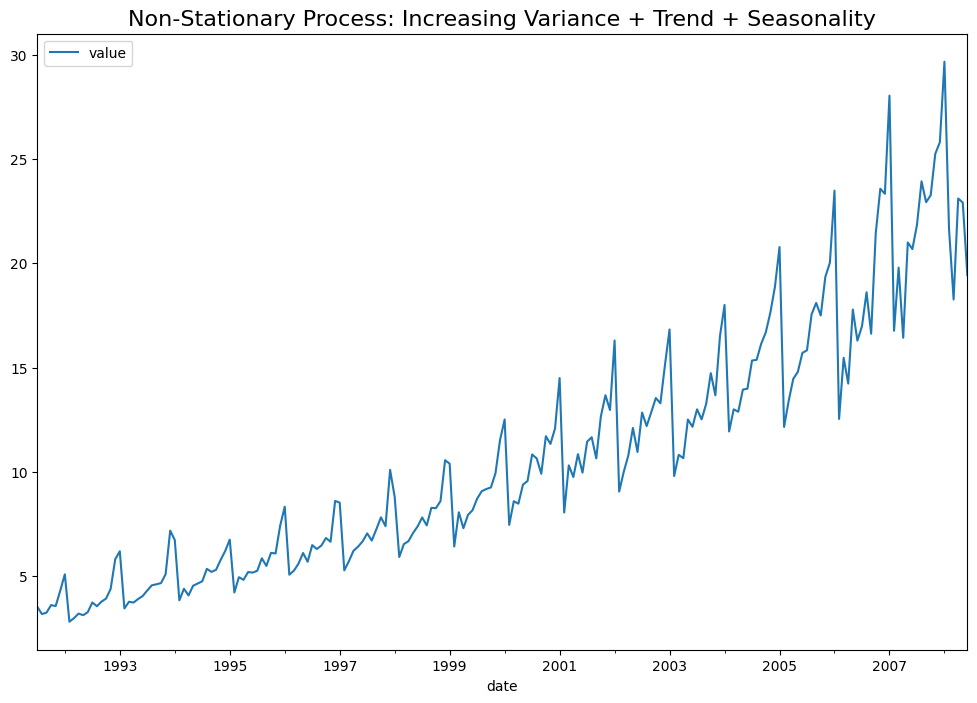

In [3]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

## ADF
def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


In [5]:
ADF(df)

---- Adfuller ----
ADF Statistic: 3.145186
p-value: 1.0000000000
Lag: 15
observation: 188
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [6]:
# log 변환 : 분산을 일정하게 하기 위해

df_vsf = np.log(df)
df_vsf.head()

,value
date,
1991-07-01,1.260332
1991-08-01,1.157161
1991-09-01,1.179338
1991-10-01,1.283986
1991-11-01,1.271408


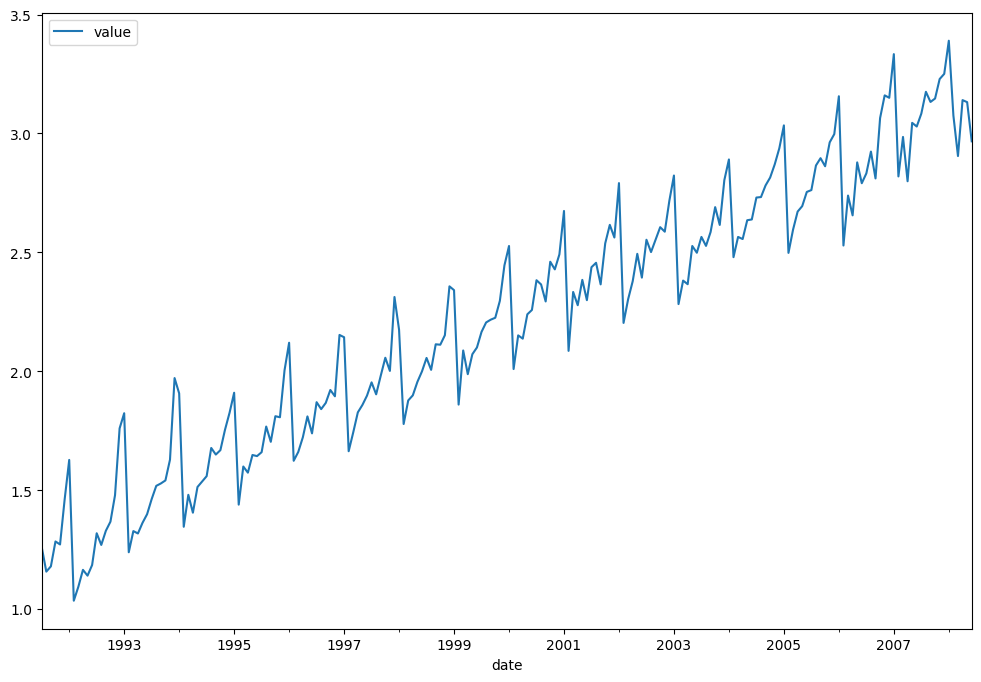

In [8]:
df_vsf.plot(figsize=[12, 8])
plt.show()

In [10]:
# 차분을 통한 추세 제거
df_vsf1 = df_vsf.diff(1).iloc[1:,:]

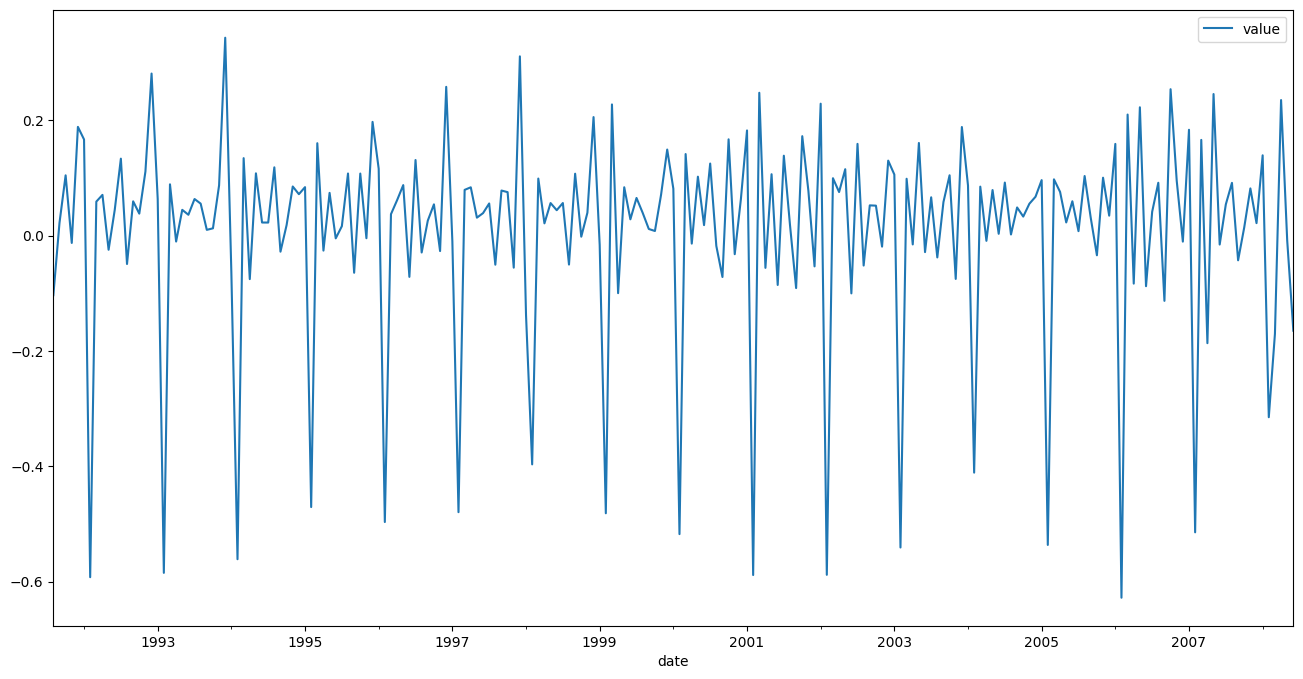

In [11]:
df_vsf1.plot(figsize = [16,8])
plt.show()

In [12]:
ADF(df_vsf1)

---- Adfuller ----
ADF Statistic: -4.519432
p-value: 0.0001813384
Lag: 13
observation: 189
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


In [14]:
#차분, timelag : 12 계절성 제거
df_vsf12 = df_vsf1.diff(12).dropna()

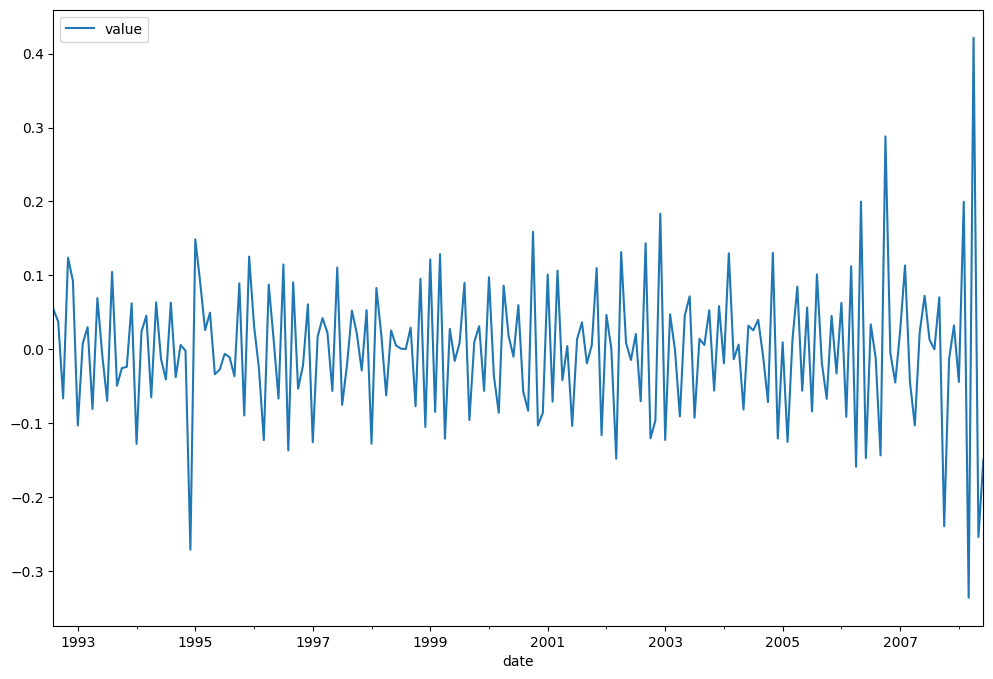

In [16]:
df_vsf12.plot(figsize = [12,8])
plt.show()

In [17]:
ADF(df_vsf12)

---- Adfuller ----
ADF Statistic: -4.785546
p-value: 0.0000579565
Lag: 13
observation: 177
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
